In [1]:
import numpy as np
import math
import random
import heapq
import matplotlib.pyplot as plt

In [21]:

qty = 5  # or however many points you want(群體規模)

deltas = set()
randPoints = []
excluded = set()
i = 0
while i<qty:
    x = random.uniform(2,4)
    x = round(x,5)
    y = random.uniform(-1,2)
    y = round(y,5)
    if x+y<3: continue
    randPoints.append([x,y])
    i += 1
    excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
    
print (randPoints)

[[2.82682, 1.87358], [3.69137, 1.82586], [3.29225, -0.06191], [2.36651, 0.67971], [3.92184, -0.07369]]


In [15]:
Dim=2         #dimension
pop_size=20   #population_size
w_it_max=0.7 #inertia weight max 
w_it_min=0.3  #inertia weight min 
c1=2.05         #acceleration factor
c2=2.05         #acceleration factor
max_iter=300  #iterations
gbest =float('inf') 
def fitness(randPoints):#將x,y的list放進去可以得到全部元素的fitness
    a = []
    for i in randPoints:       
        gg=(i[1]- 1)**4-(math.sin(5*math.pi*(i[0]**(3/4)-0.1))**2) 
        a.append(gg)
    return a

def pbest(fit):#將fitness 的list 放入可以得到區域最佳解
    a = fitness(randPoints)
    b = np.argmin(a)
    c = randPoints[b]
    return [min(a),c]


#def vel(randPoints):#生出該點xy的速度
    #all_vel = []
    #for i in randPoints:
        #vel1=w*i[0]+c1*np.random.random()*(small-i[0])+c2*np.random.random()*(gbest-i[0])
        #vel2=w*i[1]+c1*np.random.random()*(small-i[1])+c2*np.random.random()*(gbest-i[1])
        #vel = [vel1,vel2]
        #all_vel.append(vel)
    #return(all_vel)
def vel(i,w,gbest):#生出該點xy的速度
    vel1=w*i[0]+c1*np.random.random()*(pbest(fit)[0]-i[0])+c2*np.random.random()*(gbest-i[0])
    vel2=w*i[1]+c1*np.random.random()*(pbest(fit)[0]-i[1])+c2*np.random.random()*(gbest-i[1])
    vel = [vel1,vel2]
    
    
    return(vel)
def new_location(randPoints):#舊位子加上向量變成新位子
    new = []
    for i in randPoints:
        
        a =  i[0]+vel(i,w,gbest)[0]
        b =  i[1]+vel(i,w,gbest)[1]
        c = [a,b]
        new.append(c)
    return new


In [22]:
btl = []
gtl = []
max_iter= 1000
Dim=2         #dimension
pop_size=20   #population_size
w_it_max=1  #inertia weight max 
w_it_min=0.3  #inertia weight min 
c1=2.05          #acceleration factor
        
c2=2.05          #acceleration factor

gbest =10000
t = 0 #iteration time


while t< max_iter:
    print(t)
    w=w_it_max-(t/max_iter)*(w_it_max-w_it_min)
    
    #將list的數字限制再五位數內
    for i in range(5):
        for j in range(2):
            f = randPoints[i][j] 
            f = round(f,7)
            randPoints[i][j] = f
          
    
    ##檢測list是否有在範圍內，如果超出即回彈
    for i in range(5):       
        while 2>=randPoints[i][0]or randPoints[i][0] >=4:
            
            if randPoints[i][0] <2:
                randPoints[i][0]  = 2+(2-randPoints[i][0])
                
            else:
                randPoints[i][0]  = 4-(randPoints[i][0]-4)
                
        if randPoints[i][0]+randPoints[i][1]<3:
            randPoints[i][1] = 3-randPoints[i][0]       
    #將list的數字限制再五位數內
    for i in range(5):
        for j in range(2):
            f = randPoints[i][j] 
            f = round(f,7)
            randPoints[i][j] = f
    
    fit = fitness(randPoints)#將x,y的list放進去可以得到全部元素的fitness
    nowgood = pbest(fit)[0]
    btl.append(nowgood)
    
    #this_time_good = pbest(fit)[0]#將fitness 的list 放入可以得到區域最佳解,[0]是fitness,[1]是座標
    allgood = min(gbest,pbest(fit)[0])
    gtl.append(allgood)
    print(allgood)
    if pbest(fit)[0]<gbest:
        gbest = min(gbest,pbest(fit)[0])
        allgbest = pbest(fit)[1]
        for i in randPoints:
            vel1=w*i[0]+c1*np.random.random()*(pbest(fit)[0]-i[0])+c2*np.random.random()*(gbest-i[0])
            vel2=w*i[1]+c1*np.random.random()*(pbest(fit)[0]-i[1])+c2*np.random.random()*(gbest-i[1])
            bestvel = [vel1,vel2]
        
    g = new_location(randPoints)
    randPoints =g 
    print("ggggggggggggg",randPoints)
    t +=1
print(gbest)
print(allgbest)

0
-0.32291487460455803
ggggggggggggg [[-2.542232982607153, 3.1469577275218246], [-3.8272598284036548, -2.321382356688551], [-1.7320609349070946, -0.5138851794637018], [-3.5457347586850734, 0.453751986614576], [-0.22821104689307914, -0.41085978614546914]]
1
-0.848540054211532
ggggggggggggg [[-4.400516659253112, -4.3427832989753306], [-2.151879217823513, -1.676164435468253], [-2.4153272957488094, -2.8355524736111497], [-3.824323635161017, -1.7945321404805579], [-0.9184295131276361, -1.5366473915700576]]
2
-0.8713609758750935
ggggggggggggg [[-1.4453362787724187, -1.866865289991137], [-4.970523560337446, -1.7880359153459342], [-2.727098998715944, -1.0286754830943357], [-3.2181016283189083, -1.7779142081824448], [2.6426327301390637, -1.8049085943299221]]
3
-0.8713609758750935
ggggggggggggg [[-4.975457542506356, -0.4859660489992037], [-4.734206694696411, -1.8085093574125388], [4.150550640447635, -1.8501745420513087], [-3.644983744542839, -1.6010162688069816], [-3.1249440180642853, -1.5689956

265
-0.998687967273475
ggggggggggggg [[-10.449422636226135, -1.3560832241132743], [-0.6536005409330023, -1.8342222271682254], [-0.6491721716074101, -3.41663180164565], [-2.503389038929119, -3.0388501405737673], [-5.52760915171522, -0.5593687392264581]]
266
-0.998687967273475
ggggggggggggg [[-3.071625069281585, -4.262593761773013], [0.45261281661445185, -1.6478361529802092], [-0.27345927834046124, -2.1773285723081734], [2.533394733472476, -3.8860588075652527], [-7.1403378723697415, -2.968977067404593]]
267
-0.998687967273475
ggggggggggggg [[-2.675978535716801, -2.39061123528757], [-1.27401877212872, -2.0010898169187215], [-5.833110837863605, -1.8154457437598164], [-3.439626255965765, -1.6977359248786437], [-0.42587459021696095, -1.6817352864676551]]
268
-0.998687967273475
ggggggggggggg [[-7.4263997503224, -0.402977039005561], [-4.037401837885936, -3.0964196473288816], [-1.2686698312639897, -3.6377397241869165], [4.639029043699221, -0.9364165519047745], [-2.5346881510743717, -2.334704106

ggggggggggggg [[-3.325786977956717, -1.9747957296670746], [3.201447004722464, -1.8855954867515363], [-4.75864581857525, -1.171954412319346], [-0.8578699462011201, -1.2907355961364055], [2.693026534067128, -1.8316318937652212]]
501
-0.9987023299694616
ggggggggggggg [[-0.039086704739469624, -1.0702186385335655], [1.4901190326948917, 0.20188496967235242], [1.1551022182824875, -1.2309400152826067], [2.2993640545532332, -0.31324217820902034], [0.7454607194107203, -1.7860838354217592]]
502
-0.9987023299694616
ggggggggggggg [[-1.6223920356898156, -1.6315484564499796], [-4.067670288451096, -2.766839575254144], [1.3204897065550822, -2.5440238512215134], [-4.319815887181479, -1.2976118431385997], [-4.1312779119116385, -1.2635965416414094]]
503
-0.9987023299694616
ggggggggggggg [[0.6347969824449131, -2.4582610267121465], [-6.66048706232262, -0.8142004551570245], [-4.695175929779706, -0.042074507698266594], [-8.726602875858365, -1.2659878957976523], [1.47082354378681, -0.2981456064283198]]
504
-0.

ggggggggggggg [[-3.918322518727885, 0.26809035608677667], [-1.1978567350960798, 0.31588280139270086], [-0.8257426583116088, -1.0883754901918108], [-4.477717683400195, -1.0193411235489056], [3.3304114160663527, -1.19900489478818]]
671
-0.9987023299694616
ggggggggggggg [[-11.775162398406577, -2.2198761651332424], [-4.595777820150767, -1.830060304615629], [-2.9893765986828296, -2.211531515906295], [-6.515410032571982, -1.7101810151071928], [3.509754140969592, -1.2761668859940967]]
672
-0.9987023299694616
ggggggggggggg [[0.19593168427734664, -1.6586829572531334], [0.23974694967315946, -2.1148239465558607], [-0.3791390450218506, -1.1402457592069317], [-5.361512092780386, -1.9644630784696748], [-2.140987305955212, -1.9093100953546838]]
673
-0.9987023299694616
ggggggggggggg [[-4.948303948196274, -1.2346806239735686], [0.05961535429451548, -1.6412994491604027], [-3.7630610251546392, -1.463118855178086], [-6.533217503844179, -1.2613098396516524], [-6.928316857571873, -1.8919862795758382]]
674
-

ggggggggggggg [[-3.2388251488390774, -0.5753191305560725], [-3.6553328832159027, -1.8767736834795843], [-9.111606531329443, -1.3195853165968083], [-0.5162611688539274, -1.3930449005059304], [1.3694148484377182, -0.7242329538075843]]
890
-0.9987063675150352
ggggggggggggg [[-2.2105209559734935, -1.3322963763829585], [-4.340213552830967, -0.8112997369296883], [-2.1852768229105703, -1.3473363852283906], [-3.1967742703910402, -1.1125203151604004], [-6.1394582106884314, -2.5691579044968544]]
891
-0.9987063675150352
ggggggggggggg [[-2.6422213360753766, -1.2347691865107198], [1.444149593675673, -1.7681668657412806], [0.29308243297679026, -3.0284151922028157], [2.455361317551714, -1.8151925572944227], [-1.2681459532136623, -4.644682591166593]]
892
-0.9987063675150352
ggggggggggggg [[-5.298560286790194, -2.6165243807303042], [-6.999276792307359, -2.6797343646569214], [-4.850318122885316, -1.2098677824455053], [-0.26889411821724307, 0.034818360018819106], [-5.365794087498903, -0.8604566109533389]

In [32]:
gg=( 1.08386- 1)**4-(math.sin(5*math.pi*(2.86506**(3/4)-0.1))**2)
gg

-0.9987921067227551

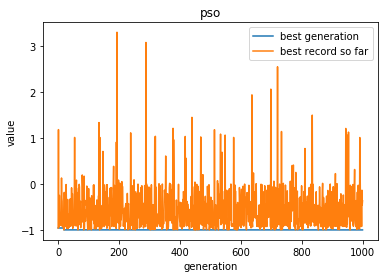

In [39]:
plt.figure()
plt.title("pso")
plt.plot([i for i in range(1000)],gtl,label = "best generation")
plt.plot([i for i in range(1000)],btl,label = "best record so far")
plt.xlabel("generation")
plt.ylabel("value")
plt.legend(loc = "best")
plt.show()

In [7]:
Lb=-5.12*np.ones(Dim)
Lb

array([-5.12, -5.12])

In [8]:

bestvel

[-4.879785246170501, -3.3703768912305043]

In [ ]:
x = [-0.9993038093963635,-0.9999547733923349,-0.9999135185720498,-0.9999816145650491,-0.9997442834728655]

In [ ]:
y = [-0.9991697171768363,-0.9996977616523071,-0.9987037786806133,-0.9997900603156877,-0.9987063675150352]

In [24]:

a = -4.998897999398663/5
a #ga的x bar

-0.9997795998797325

In [25]:
b = -4.99606768534048/5
b #pso的x bar

-0.9992135370680961

In [27]:
a = ((-0.9993038093963635--0.9997795998797325)**2+(-0.9999547733923349--0.9997795998797325)**2+(-0.9999135185720498--0.9997795998797325)**2+(-0.9999816145650491--0.9997795998797325)**2+(-0.9997442834728655--0.9997795998797325)**2)/4
a #ga的變異數

7.926343535286085e-08

In [28]:
b = ((-0.9991697171768363--0.9992135370680961)**2+(-0.9996977616523071--0.9992135370680961)**2+(-0.9987037786806133--0.9992135370680961)**2+(-0.9997900603156877--0.9992135370680961)**2+(-0.9987063675150352--0.9992135370680961)**2)/4
b #pso的變異數

2.714618137497404e-07

In [29]:
z = (-0.9997795998797325--0.9992135370680961)/np.sqrt((7.926343535286085e-08/5)+(2.714618137497404e-07/5))
z #t值

-2.137303072942462

In [ ]:
#進行假設檢定
H0:x-y = 0
H1:x-y !=0
"t檢定 rr":{abs(z)>=z(0.05)=1.860}
#拒絕h0 可知ga與pso顯著不同